In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [4]:
#int he above dataframe alll the column are not numeric so we will consider obly those column whose valus are in numeric and will make all numeric ot float

In [6]:
df.dtypes
for x in df:
    if df[x].dtypes == "int64":
        df[x] = df[x].astype(float)
        print(df[x].dtypes)

float64
float64
float64
float64
float64
float64
float64
float64


In [7]:
df  =df.select_dtypes(exclude=['object'])
df = df.fillna(df.mean())
x = df.drop('price',axis=1)
y = df['price']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.6,random_state=42)

In [13]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=1000 , random_state=42)
regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [14]:
y_pred = regressor.predict(x_test)

In [15]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
95,8249.0,7443.820000
15,41315.0,26939.175000
30,6855.0,6083.644000
158,9258.0,8220.923333
128,11850.0,13465.183000
...,...,...
64,25552.0,21086.251000
44,32250.0,33492.112000
163,8449.0,12896.379000
28,12964.0,13591.919000


In [20]:
from sklearn import metrics
print('MeanABSOLUTE ERROR:',metrics.mean_absolute_error(y_test,y_pred))
print('mean squared error:',metrics.mean_squared_error(y_test,y_pred))
print('root_Mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MeanABSOLUTE ERROR: 2349.73495356159
mean squared error: 15671440.644856608
root_Mean_squared_error: 3958.7170453136214


In [21]:
# Calculated the absolute errorsy_pred - y_test
errors = abs(y_pred - y_test)
# print out the mean absolute erro (mae)
print('Mean absolute error:',round(np.mean(errors),2),'degrees.')

#Calculate mean absolute percentage error (MAPE)

mape = 100*(errors/y_test)
#calculate and dsiplay accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy',round(accuracy,2),'%.')

Mean absolute error: 2349.73 degrees.
Accuracy 85.02 %.


C:\Users\Aryan Maheshwari\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Aryan Maheshwari\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


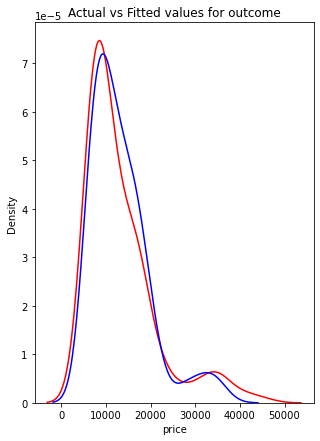

In [23]:
plt.figure(figsize=(5,7))

ax = sns.distplot(y, hist = False, color = "r", label = "Actual value")
sns.distplot(y_pred, hist = False, color="b", label= "Fitted values", ax=ax)

plt.title('Actual vs Fitted values for outcome')

plt.show()
plt.close()